In [1]:
# Pandas for reading data in .csv format 
import pandas as pd
import os

# Plotting tools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
def data_columns(data, duration=None, randomseed=False, output=False):
    if output is True:
        dim1, dim2, dim3 = data[:,0], data[:,1], data[:,2]
    else:
        dim1, dim2, dim3 = np.array(data['hand_orig_rua_x']), np.array(data['hand_orig_rua_y']), np.array(data['hand_orig_rua_z'])

    if duration is not None:
        if randomseed:
            np.random.seed(42)
        else: 
            np.random.seed(None)
        reduced_samples = 10 * duration
        start_index = np.random.choice(len(dim1) - reduced_samples + 1)
        dim1 = dim1[start_index : start_index + reduced_samples]
        dim2 = dim2[start_index : start_index + reduced_samples]
        dim3 = dim3[start_index : start_index + reduced_samples]
        
    return dim1, dim2, dim3
    
def output_visualization(data, duration=None, randomseed=False):
    
    fig = plt.figure(figsize=(10, 5))

    dim1, dim2, dim3 = data_columns(data)
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(dim1, dim2, dim3, c='b', marker='o')
    ax.set_xlabel('X-Dimension')
    ax.set_ylabel('Y-Dimension')
    ax.set_zlabel('Z-Dimension')
    ax.set_title('X-Y-Z Coordinates (all) in 3D Space')

    dim1, dim2, dim3 = data_columns(data, duration, randomseed)
    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(dim1, dim2, dim3, c='b', marker='o')
    ax.set_xlabel('X-Dimension')
    ax.set_ylabel('Y-Dimension')
    ax.set_zlabel('Z-Dimension')
    ax.set_title('X-Y-Z Coordinates (some) in 3D Space')

    plt.tight_layout()  
    plt.show()

def interactive_output_visualization(data, duration=None, randomseed=False, output=False, output_data = None):
    
    dim1, dim2, dim3 = data_columns(data, duration, randomseed, output)
    
    trace = go.Scatter3d(x=dim1, y=dim2, z=dim3, mode='markers', marker=dict(size=3, 
                                                                             color='blue', 
                                                                             opacity=0.8),
                                                                             name="Input Points")
    if output:
        dim1, dim2, dim3 = data_columns(output_data, duration, randomseed, output)
        trace_output = go.Scatter3d(x=dim1, y=dim2, z=dim3, mode='markers', marker=dict(size=3, 
                                                                                    color='red', 
                                                                                    opacity=0.8), 
                                                                                    name='Output Points')
        traces = [trace, trace_output]
        title = 'Input and Output Points in 3D Space'
    else:
        traces = [trace]
        title = 'Values in 3D Space'

    layout = go.Layout(title=title, scene=dict(xaxis=dict(title='X-Dimension'),
                                                                        yaxis=dict(title='Y-Dimension'),
                                                                        zaxis=dict(title='Z-Dimension')))

    fig = go.Figure(data=traces, layout=layout)
    fig.show()

def pltshow(x_lable, y_label, title, legend = False):
    
    plt.xlabel(x_lable)
    plt.ylabel(y_label)
    plt.title(title)
    if legend == True:
        plt.legend()
    plt.show()

def correlationPlot(data):
    pressure_label = "sw_pres"      # Smart Watch Pressure
    yPos_label = "hand_orig_rua_y"    # Y Hand Position
    dim1, dim2 = np.array(data[pressure_label]), np.array(data[yPos_label])
    dim1, dim2 = dim1[1:], dim2[1:]
    
    slope, intercept = np.polyfit(dim1, dim2, deg=1)
    regression_line = slope * dim1 + intercept

    mse = np.mean((dim2 - regression_line)**2)

    plt.scatter(dim1, dim2, c='b', marker='.')
    plt.plot(dim1, regression_line, c='r', label='Linear Fit')
    pltshow("Smart Watch Pressure", "Y Hand Positon", f"Correlation between {pressure_label} & {yPos_label}\nMSE: {mse: .3f}", legend=True)

def distributionPlot(data, columns):
    
    if type(columns) != str and len(columns) > 1:
        fig, axes = plt.subplots(2, 3, figsize=(10,5))

        for i, column_name in enumerate(columns):
            row = i // 3
            col = i % 3
        
            values = data[column_name]    
            mean_acceleration = np.mean(values)
            std_acceleration = np.std(values)
            axes[row, col].hist(values, bins='auto', density=True, alpha=0.7, color='b')
            x = np.linspace(mean_acceleration - 3 * std_acceleration, mean_acceleration + 3 * std_acceleration, 100)
            y = (1 / (std_acceleration * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_acceleration) / std_acceleration) ** 2)
            axes[row, col].plot(x, y, color='r')
            axes[row, col].set_xlabel(column_name)
            axes[row, col].set_ylabel('Density')
            axes[row, col].set_title('Distribution of ' + column_name)

        plt.tight_layout()
        plt.show()
    else: 
        values = data[columns]
        
        mean_acceleration = np.mean(values)
        std_acceleration = np.std(values)
        plt.hist(values, bins='auto', density=True, alpha=0.7, color='b')
        x = np.linspace(mean_acceleration - 3 * std_acceleration, mean_acceleration + 3 * std_acceleration, 100)
        y = (1 / (std_acceleration * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_acceleration) / std_acceleration) ** 2)
        plt.plot(x, y, color='r')
        pltshow(columns, 'Density','Distribution of ' + columns)

In [3]:
path = '/Users/affanbinusman/Dropbox (ASU)/IRL-Lab/P&G/hackathon_data'     # Update path where your data is located

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
csv_file = csv_files[0]
# Read data from each file and store it in a list
data_list = []
# for csv_file in csv_files:
file_path = os.path.join(path, csv_file)
df = pd.read_csv(file_path)
data_list.append(df)

# Concatenate the data from all files into a single DataFrame
data = pd.concat(data_list, ignore_index=True) # Use the `ignore_index=True` parameter to reset the index of the concatenated DataFrame

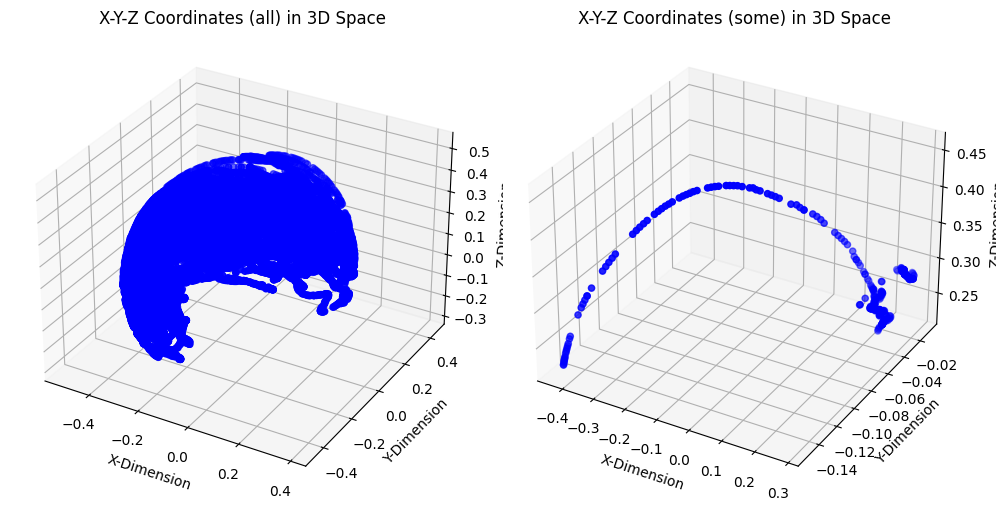

In [4]:
duration = 40       
output_visualization(data, duration=duration, randomseed=False)

interactive_output_visualization(data)
interactive_output_visualization(data, duration=duration, randomseed=False)

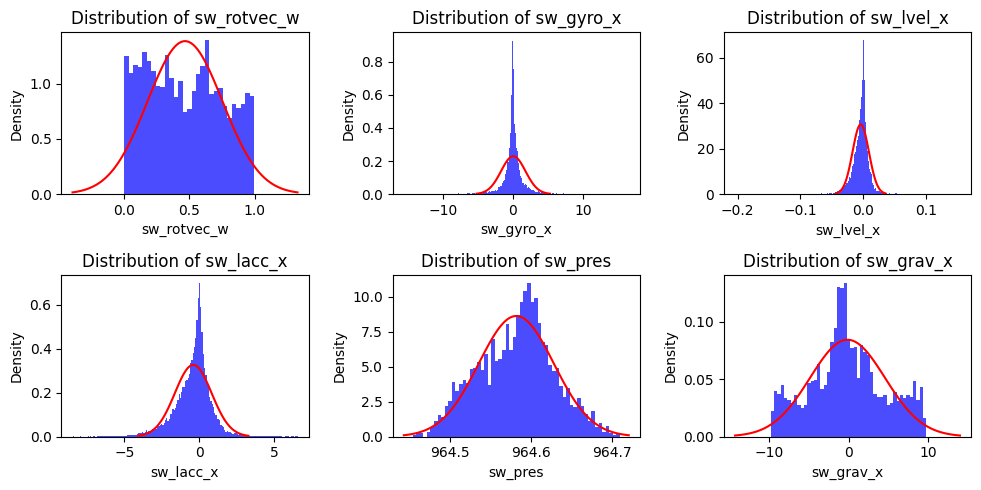

In [5]:
distributionPlot(data, ["sw_rotvec_w", 'sw_gyro_x', 'sw_lvel_x', "sw_lacc_x", 'sw_pres', 'sw_grav_x'])

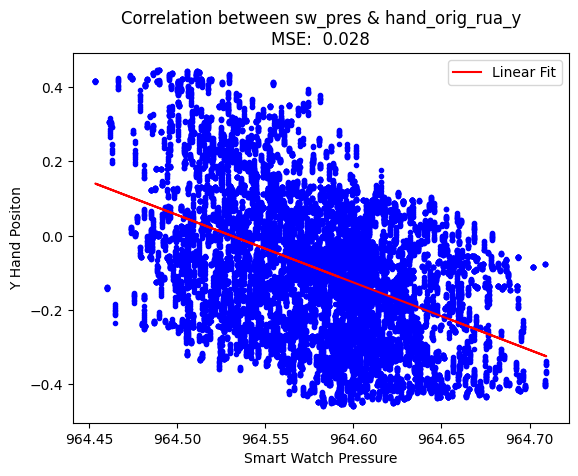

In [6]:
correlationPlot(data)

In [7]:
def hamilton_product(a: np.array, b: np.array):
    """
    Hamilton product for two quaternions or a Vec4 and a Quaternion.
    :param a: quaternion or vec4 in order [w,x,y,z]
    :param b: quaternion in order [w,x,y,z]
    """
    # check shape to deal with a whole column of rotations
    if len(a.shape) > 1:
        a = [a[:, 0], a[:, 1], a[:, 2], a[:, 3]]
    if len(b.shape) > 1:
        b = [b[:, 0], b[:, 1], b[:, 2], b[:, 3]]
    h_p = np.array([
        a[0] * b[0] - a[1] * b[1] - a[2] * b[2] - a[3] * b[3],
        a[0] * b[1] + a[1] * b[0] + a[2] * b[3] - a[3] * b[2],
        a[0] * b[2] - a[1] * b[3] + a[2] * b[0] + a[3] * b[1],
        a[0] * b[3] + a[1] * b[2] - a[2] * b[1] + a[3] * b[0]
    ], dtype=np.float64)
    if len(h_p.shape) > 1:
        return h_p.transpose()
    else:
        return h_p
    

def quat_invert(q: np.array):
    """
    estimates the inverse rotation.
    :param q: input quaternion
    :return: inverse quaternion
    """
    q_s = q * np.array([1, -1, -1, -1], dtype=np.float64)  # the conjugate of the quaternion
    if len(q.shape) > 1:
        return q_s / np.sum(np.square(q, dtype=np.float64), axis=1, keepdims=True, dtype=np.float64)
    else:
        return q_s / np.sum(np.square(q, dtype=np.float64), dtype=np.float64)

In [8]:
path = '/Users/affanbinusman/Dropbox (ASU)/IRL-Lab/P&G/hackathon_data'     # Update path where your data is located

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]
csv_file = csv_files[0]
# Read data from each file and store it in a list
data_list = []
# for csv_file in csv_files:
file_path = os.path.join(path, csv_file)
df = pd.read_csv(file_path)
data_list.append(df)

# Concatenate the data from all files into a single DataFrame
data = pd.concat(data_list, ignore_index=True) # Use the `ignore_index=True` parameter to reset the index of the concatenated DataFrame

In [9]:
columns_to_normalize = ["sw_rotvec_w", 'sw_gyro_x', 'sw_lvel_x', "sw_lacc_x", 'sw_pres', 'sw_grav_x']
print(data[columns_to_normalize])


       sw_rotvec_w  sw_gyro_x  sw_lvel_x  sw_lacc_x     sw_pres  sw_grav_x
0         0.182404  -0.036528  -0.003461  -0.057394  964.655518  -0.693504
1         0.182975  -0.004887   0.000000   0.000000  964.655518  -0.702292
2         0.183273  -0.021991   0.001490   0.148441  964.655518  -0.705316
3         0.184316  -0.046426   0.000409   0.040701  964.655518  -0.706930
4         0.184468  -0.059865   0.000962   0.095768  964.655518  -0.708515
...            ...        ...        ...        ...         ...        ...
22861     0.623723  -0.039095  -0.000962  -0.095768  964.584229  -1.215055
22862     0.623727  -0.040317   0.000120   0.011971  964.591309  -1.215586
22863     0.623754  -0.021991   0.000627   0.062249  964.591309  -1.217250
22864     0.623783  -0.041539   0.001274   0.126893  964.591309  -1.221414
22865     0.623861  -0.043389  -0.001322  -0.045243  964.591309  -1.223297

[22866 rows x 6 columns]


In [10]:
sw_forward = np.array(data[["sw_forward_w", "sw_forward_x", "sw_forward_y", "sw_forward_z"]])
sw_rotvec = np.array(data[["sw_rotvec_w", "sw_rotvec_x", "sw_rotvec_y", "sw_rotvec_z"]])
hamilton = hamilton_product(quat_invert(sw_forward), sw_rotvec)

data["sw_rotvec_w"] = hamilton[:, 0]
data["sw_rotvec_x"] = hamilton[:, 1]
data["sw_rotvec_y"] = hamilton[:, 2]
data["sw_rotvec_z"] = hamilton[:, 3]

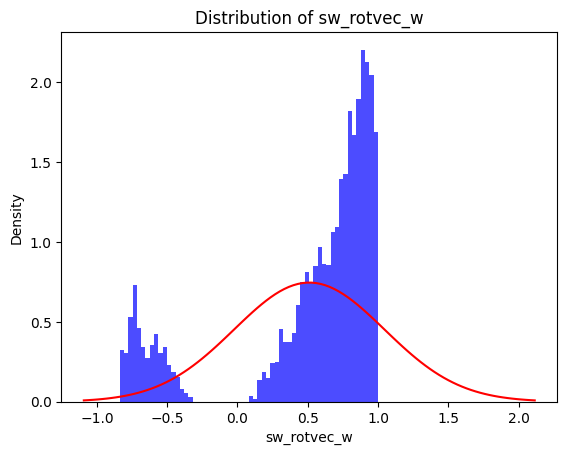

In [11]:
distributionPlot(data, "sw_rotvec_w")

In [12]:
columns_to_normalize = ["sw_rotvec_w", 'sw_gyro_x', 'sw_lvel_x', "sw_lacc_x", 'sw_pres', 'sw_grav_x']
print(data[columns_to_normalize])

print(data[columns_to_normalize[1]].min())
print(data[columns_to_normalize[1]].max())


       sw_rotvec_w  sw_gyro_x  sw_lvel_x  sw_lacc_x     sw_pres  sw_grav_x
0        -0.726403  -0.036528  -0.003461  -0.057394  964.655518  -0.693504
1        -0.726006  -0.004887   0.000000   0.000000  964.655518  -0.702292
2        -0.725843  -0.021991   0.001490   0.148441  964.655518  -0.705316
3        -0.725128  -0.046426   0.000409   0.040701  964.655518  -0.706930
4        -0.725051  -0.059865   0.000962   0.095768  964.655518  -0.708515
...            ...        ...        ...        ...         ...        ...
22861     0.993147  -0.039095  -0.000962  -0.095768  964.584229  -1.215055
22862     0.993140  -0.040317   0.000120   0.011971  964.591309  -1.215586
22863     0.993125  -0.021991   0.000627   0.062249  964.591309  -1.217250
22864     0.993111  -0.041539   0.001274   0.126893  964.591309  -1.221414
22865     0.993090  -0.043389  -0.001322  -0.045243  964.591309  -1.223297

[22866 rows x 6 columns]
-15.54896354675293
16.53856658935547


In [26]:
data.iloc[:, 31].mean()

-2.4859362748538448e-18

In [27]:
def normalize_data(data, columns):
    means = {}
    stds = {}

    for column in columns:
        # Calculate mean and standard deviation
        mean = data.iloc[:, column].mean()
        std = data.iloc[:, column].std()

        # Normalize the data from 0 to 100
        normalized_data = ((data.iloc[:, column] - mean) / std)

        # Update the column in the DataFrame with normalized values
        data[column] = normalized_data

        # Store the mean and standard deviation for later use
        means[column] = mean
        stds[column] = std

    return data, means, stds

# Assume you have a DataFrame named 'df' and a list of column names to normalize
# Call the normalize_data function to normalize the data and retrieve the means and standard deviations
normalized_data, means, stds = normalize_data(data, range(31,44))

columns_to_normalize = ["sw_rotvec_w", 'sw_gyro_x', 'sw_lvel_x', "sw_lacc_x", 'sw_pres', 'sw_grav_x']
print(normalized_data)
# Save the means and standard deviations for later use
# means_df = pd.DataFrame.from_dict(means, orient='index', columns=['Mean'])
# stds_df = pd.DataFrame.from_dict(stds, orient='index', columns=['Standard Deviation'])

# means_df.to_csv('means.csv')  # Save means to a CSV file
# stds_df.to_csv('stds.csv')    # Save standard deviations to a CSV file

       hand_rot_rh_w  hand_rot_rh_x  hand_rot_rh_y  hand_rot_rh_z  \
0           0.004472      -0.022602       0.999715       0.006216   
1           0.006668      -0.021905       0.999731       0.003588   
2           0.006668      -0.021905       0.999731       0.003588   
3           0.006668      -0.021905       0.999731       0.003588   
4           0.006538      -0.021855       0.999734       0.003355   
...              ...            ...            ...            ...   
22861       0.633418       0.017596       0.772887       0.033429   
22862       0.633298       0.017600       0.772981       0.033533   
22863       0.633397       0.017628       0.772891       0.033703   
22864       0.633542       0.017370       0.772806       0.033074   
22865       0.633542       0.017370       0.772806       0.033074   

       hand_orig_rua_x  hand_orig_rua_y  hand_orig_rua_z  larm_rot_rh_w  \
0             0.223577        -0.145407         0.270269       0.079851   
1             0.22294

In [14]:
col = columns_to_normalize[1]

print(normalized_data[col].min())
print(normalized_data[col].max())

-8.954855350522942
9.446866401243303


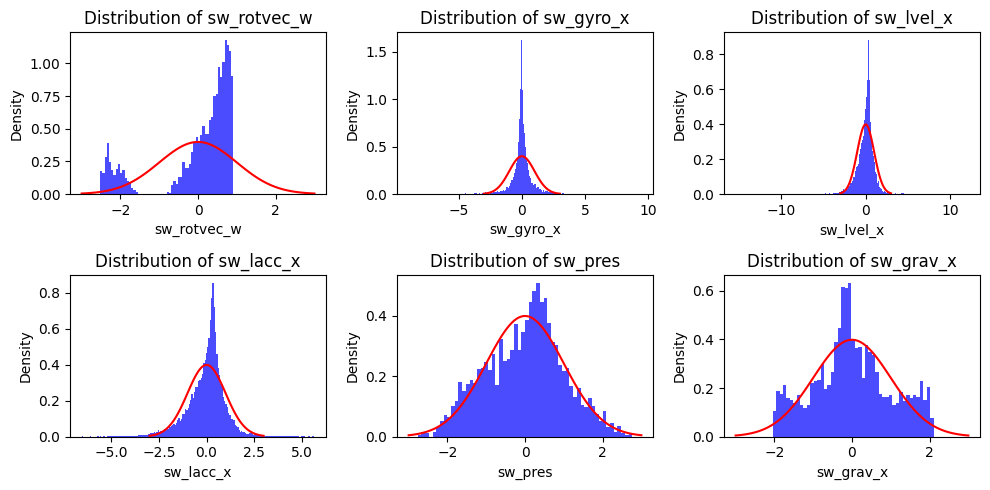

In [15]:
distributionPlot(normalized_data, ["sw_rotvec_w", 'sw_gyro_x', 'sw_lvel_x', "sw_lacc_x", 'sw_pres', 'sw_grav_x'])